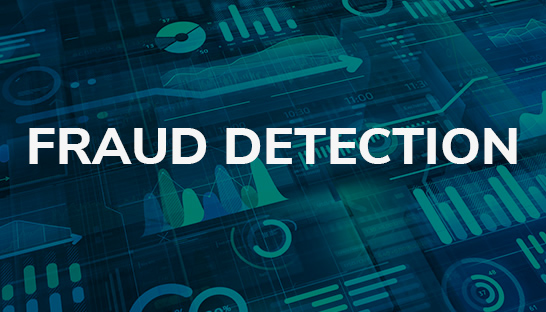

<a name="contents_table"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #fadbd8; font-size:115%; text-align:left">

<h3 align="left"><font color=#e74c3c>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Numerical Variables Univariate Analysis](#num_uni)
        - [Step 4.1.2 | Categorical Variables Univariate Analysis](#cat_uni)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
        - [Step 4.2.1 | Numerical Features vs Target](#num_target)
        - [Step 4.2.2 | Categorical Features vs Target](#cat_target)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Irrelevant Features Removal](#feature_removal)
    - [Step 5.2 | Missing Value Treatment](#missing)
    - [Step 5.3 | Outlier Treatment](#outlier)
    - [Step 5.4 | Categorical Features Encoding](#encoding)
    - [Step 5.5 | Feature Scaling](#scaling)
    - [Step 5.6 | Transforming Skewed Features](#transform)
* [Step 6 | Decision Tree Model Building](#dt)
* [Step 7 | Random Forest Model Building](#rf)
* [Step 8 | Logistic Regression Model Building](#logistic)
* [Step 9 | SVM Model Building](#svm)
* [Step 10 | Conclusion](#conclusion)
</div>

# **Problem:**

In this project, we delve into a dataset encapsulating various financial transaction metrics, including transaction type, amount, account balances, and more. Our goal is to develop a predictive model capable of accurately identifying fraudulent transactions. Given the severe financial implications of missing a fraudulent transaction, our primary emphasis is on ensuring that the model identifies all potential fraud cases, making recall for the positive class (fraud) a crucial metric.

# **Objectives:**

Explore the Dataset: Uncover patterns, distributions, and relationships within the transaction data.
Conduct Extensive Exploratory Data Analysis (EDA): Dive deep into bivariate relationships against the target variable (isFraud).
Preprocessing Steps:

Remove irrelevant features (customer identifiers)
Address missing values
Treat outliers
Encode categorical variables (transaction types)
Transform skewed features to achieve normal-like distributions using Box-Cox transformation


Model Building:

Establish pipelines for models that require scaling (Logistic Regression, SVM)
Implement and tune classification models including Logistic Regression, SVM, Decision Trees, and Random Forest
Emphasize achieving high recall for class 1 (fraud), ensuring comprehensive identification of fraudulent transactions


Evaluate and Compare Model Performance: Utilize precision, recall, F1-score, and accuracy to gauge models' effectiveness.
Create Interactive Visualizations: Build Power BI dashboards for business intelligence and fraud pattern analysis.




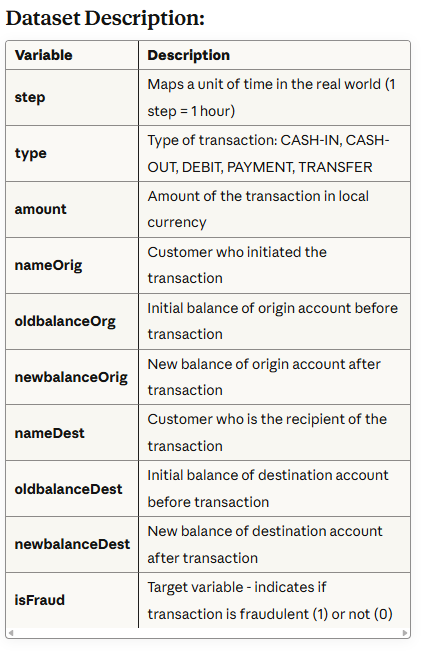


# Key Insights:

Dataset Size: 11,142 transactions

Fraud Rate: 10.25% (1,142 fraudulent transactions)

Transaction Types: CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER
Critical Finding: Fraud occurs exclusively in TRANSFER and CASH_OUT transaction types

Best Model: Decision Tree with 100% recall for fraud detection

# Fraud Detection Analysis

<a name="import"></a>

⬆️ [Back to Table of Contents](#contents_table)

# ======================================
# Step 1 | Import Libraries
# ======================================



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 100

# Configure Seaborn plot styles
sns.set(rc={'axes.facecolor': '#e8f4f8'}, style='darkgrid')


OUTPUT_DIR = './'
DATA_PATH = 'Fraud_Analysis_Dataset.csv'

<a name="read"></a>

# ======================================
# Step 2 | Read Dataset
# ======================================

⬆️ [Back to Table of Contents](#contents_table)

In [ ]:
df = pd.read_csv("/content/Fraud_Analysis_Dataset.csv")
print(f"\nDataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Description:")
print(df.describe().T)


Dataset shape: (11142, 10)

First 5 rows:
   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0             0.0        1  
1    C38997010         21182.0             0.0        1  
2   C972765878             0.0             0.0        1  
3  C1007251739         26202.0             0.0        1  
4  C1848415041             0.0             0.0        1  

Dataset Description:
                  count          mean           std   min        25%  \
step            11142.0  8.717645e+00  1.606748e+01  1.00     2.0000  

<a name="overview"></a>
<p style="background-color:#e74c3c; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"></p>

⬆️ [Back to Table of Contents](#contents_table)

# ======================================
# Step 3 | Dataset Overview
# ======================================

In [ ]:
# Step 3.1 | Dataset Basic Information
print("\n--- Step 3.1 | Dataset Basic Information ---")
print("\nDataset Info:")
df.info()

print("\nColumn Names:", df.columns.tolist())

# Define continuous and categorical features based on the dataset
continuous_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_features = ['type']

# Note: nameOrig and nameDest are identifiers, not useful for modeling
# isFraud is the target variable

print(f"\nContinuous Features: {continuous_features}")
print(f"Categorical Features: {categorical_features}")
print(f"Target Variable: isFraud")

# Convert categorical features to object type
df['type'] = df['type'].astype('object')

print("\nData types after conversion:")
print(df.dtypes)

# Step 3.2 | Summary Statistics for Numerical Variables
print("\n--- Step 3.2 | Summary Statistics for Numerical Variables ---")
print(df[continuous_features].describe().T)

# Step 3.3 | Summary Statistics for Categorical Variables
print("\n--- Step 3.3 | Summary Statistics for Categorical Variables ---")
print(df.describe(include='object'))

print("\nTarget Variable Distribution:")
print(df['isFraud'].value_counts())
print(f"\nFraud Rate: {df['isFraud'].mean() * 100:.2f}%")


--- Step 3.1 | Dataset Basic Information ---

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB

Column Names: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']

Continuous Features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'o

<a name="eda"></a>
<p style="background-color:#e74c3c; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"></p>

⬆️ [Back to Table of Contents](#contents_table)

# ==============================
# Step 4 | EDA
# ==============================

In [ ]:
# Step 4.1 | Univariate Analysis
print("\n--- Step 4.1 | Univariate Analysis ---")

# Step 4.1.1 | Numerical Variables Univariate Analysis
print("\n--- Step 4.1.1 | Numerical Variables Univariate Analysis ---")

# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3

    # Use log scale for amount features due to large range
    if col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
        # Add small value to avoid log(0)
        data = df_continuous[col] + 1
        graph = sns.histplot(data=data, bins=50, kde=False, ax=ax[x, y],
                             edgecolor='none', color='#3498db', alpha=0.6, log_scale=True)
        ax[x, y].set_xlabel(f'{col} (log scale)', fontsize=12)
    else:
        graph = sns.histplot(data=df_continuous, x=col, bins=50, kde=True, ax=ax[x, y],
                             edgecolor='none', color='#3498db', alpha=0.6)
        ax[x, y].set_xlabel(col, fontsize=12)

    ax[x, y].set_ylabel('Count', fontsize=10)
    ax[x, y].grid(color='lightgrey')

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=10, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#2980b9', edgecolor='white', pad=0.5))

plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig(OUTPUT_DIR + '01_continuous_distribution.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 01_continuous_distribution.png")

# Step 4.1.2 | Categorical Variables Univariate Analysis
print("\n--- Step 4.1.2 | Categorical Variables Univariate Analysis ---")

# Transaction Type Distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Transaction type counts
type_counts = df['type'].value_counts()
type_counts.plot(kind='barh', ax=ax[0], color='#3498db')
ax[0].set_title('Transaction Type Distribution', fontsize=16)
ax[0].set_xlabel('Count')
for i, v in enumerate(type_counts.values):
    ax[0].text(v + 50, i, f'{v:,} ({v/len(df)*100:.1f}%)', va='center', fontsize=10, fontweight='bold')

# Target distribution
target_counts = df['isFraud'].value_counts().sort_index()
target_counts.plot(kind='bar', ax=ax[1], color=['#2ecc71', '#e74c3c'])
ax[1].set_title('Fraud Distribution (Target)', fontsize=16)
ax[1].set_xlabel('isFraud')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
for i, v in enumerate(target_counts.values):
    ax[1].text(i, v + 50, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(OUTPUT_DIR + '02_categorical_distribution.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 02_categorical_distribution.png")

# Step 4.2 | Bivariate Analysis
print("\n--- Step 4.2 | Bivariate Analysis ---")

# Step 4.2.1 | Numerical Features vs Target
print("\n--- Step 4.2.1 | Numerical Features vs Target ---")

# Set color palette
sns.set_palette(['#2ecc71', '#e74c3c'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, 18), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="isFraud", y=col, ax=ax[i,0])
    ax[i,0].set_title(f'Mean {col} by Fraud Status')

    # KDE plot showing the distribution of the feature for each target category
    # Use log scale for large value features
    if col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
        # Filter out zeros for log transform
        non_fraud_data = df[df["isFraud"]==0][col]
        fraud_data = df[df["isFraud"]==1][col]

        # Add small constant to handle zeros
        non_fraud_data = non_fraud_data + 1
        fraud_data = fraud_data + 1

        sns.kdeplot(data=non_fraud_data, fill=True, linewidth=2, ax=ax[i,1], label='Non-Fraud', log_scale=True)
        sns.kdeplot(data=fraud_data, fill=True, linewidth=2, ax=ax[i,1], label='Fraud', log_scale=True)
        ax[i,1].set_xlabel(f'{col} (log scale)')
    else:
        sns.kdeplot(data=df[df["isFraud"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='Non-Fraud')
        sns.kdeplot(data=df[df["isFraud"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='Fraud')

    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Fraud Status', loc='upper right')
    ax[i,1].set_title(f'{col} Distribution by Fraud Status')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.2f')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.savefig(OUTPUT_DIR + '03_numerical_vs_target.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 03_numerical_vs_target.png")

# Step 4.2.2 | Categorical Features vs Target
print("\n--- Step 4.2.2 | Categorical Features vs Target ---")

fig, ax = plt.subplots(figsize=(12, 6))

# Create a cross tabulation showing the proportion
cross_tab = pd.crosstab(index=df['type'], columns=df['isFraud'])
cross_tab_prop = pd.crosstab(index=df['type'], columns=df['isFraud'], normalize='index')

# Define colormap
cmp = ListedColormap(['#2ecc71', '#e74c3c'])

# Plot stacked bar charts
cross_tab_prop.plot(kind='bar', ax=ax, stacked=True, width=0.8, colormap=cmp, legend=True)

# Add the proportions and counts of the individual bars
for idx, val in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
        ax.text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                color="black" if proportion > 0.1 else "white", fontsize=9, fontweight="bold")

ax.legend(title='isFraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])
ax.set_ylim([0, 1.05])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Proportion')
ax.set_title('Transaction Type vs Fraud Status', fontsize=16)

plt.tight_layout()
plt.savefig(OUTPUT_DIR + '04_categorical_vs_target.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 04_categorical_vs_target.png")

# Correlation Heatmap
print("\n--- Correlation Analysis ---")

# Create numeric version for correlation
df_numeric = df.copy()
df_numeric = pd.get_dummies(df_numeric, columns=['type'], drop_first=True)
df_numeric = df_numeric.drop(['nameOrig', 'nameDest'], axis=1)

plt.figure(figsize=(12, 8))
plt.title('Correlation of Attributes', y=1.05, size=16)
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', cbar=True,
            square=True, linewidths=0.5)
plt.tight_layout()
plt.savefig(OUTPUT_DIR + '05_correlation_heatmap.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 05_correlation_heatmap.png")

print("\nCorrelation with isFraud:")
print(corr_matrix['isFraud'].sort_values(ascending=False))


--- Step 4.1 | Univariate Analysis ---

--- Step 4.1.1 | Numerical Variables Univariate Analysis ---
Saved: 01_continuous_distribution.png

--- Step 4.1.2 | Categorical Variables Univariate Analysis ---
Saved: 02_categorical_distribution.png

--- Step 4.2 | Bivariate Analysis ---

--- Step 4.2.1 | Numerical Features vs Target ---
Saved: 03_numerical_vs_target.png

--- Step 4.2.2 | Categorical Features vs Target ---
Saved: 04_categorical_vs_target.png

--- Correlation Analysis ---
Saved: 05_correlation_heatmap.png

Correlation with isFraud:
isFraud           1.000000
step              0.831961
amount            0.435490
type_TRANSFER     0.362587
type_CASH_OUT     0.305758
oldbalanceOrg     0.046445
newbalanceDest   -0.002864
oldbalanceDest   -0.056575
type_DEBIT       -0.060498
newbalanceOrig   -0.127912
type_PAYMENT     -0.334255
Name: isFraud, dtype: float64


<a name="preprocessing"></a>
<p style="background-color:#e74c3c; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"></p>

⬆️ [Back to Table of Contents](#contents_table)

# =================================
# Step 5 | Data Preprocessing
# =================================

In [ ]:
# Step 5.1 | Irrelevant Features Removal
print("\n--- Step 5.1 | Irrelevant Features Removal ---")
print("Removing nameOrig and nameDest as they are customer identifiers and not useful for modeling")

df_processed = df.drop(['nameOrig', 'nameDest'], axis=1)
print(f"Remaining columns: {df_processed.columns.tolist()}")

# Step 5.2 | Missing Value Treatment
print("\n--- Step 5.2 | Missing Value Treatment ---")
missing_values = df_processed.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

if missing_values == 0:
    print("No missing values found - no treatment needed")

# Step 5.3 | Outlier Treatment
print("\n--- Step 5.3 | Outlier Treatment ---")

# Check for outliers using IQR method for continuous features
Q1 = df_processed[continuous_features].quantile(0.25)
Q3 = df_processed[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count = ((df_processed[continuous_features] < (Q1 - 1.5 * IQR)) |
                  (df_processed[continuous_features] > (Q3 + 1.5 * IQR))).sum()

print("\nOutliers count per feature (IQR method):")
print(outliers_count)

print("\nNote: Given the nature of fraud detection and the large dataset size,")
print("we'll apply Box-Cox transformation to reduce the impact of outliers rather than removing them.")

# Step 5.4 | Categorical Features Encoding
print("\n--- Step 5.4 | Categorical Features Encoding ---")

# One-hot encode the 'type' feature
df_encoded = pd.get_dummies(df_processed, columns=['type'], drop_first=True)

# Convert boolean columns to int
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype('uint8')

print("One-hot encoded 'type' feature")
print(f"New columns: {df_encoded.columns.tolist()}")
print(f"\nData types after encoding:")
print(df_encoded.dtypes)

# Step 5.5 | Feature Scaling
print("\n--- Step 5.5 | Feature Scaling ---")
print("Feature scaling will be handled later using pipelines for models that require it (LR, SVM).")

# Step 5.6 | Transforming Skewed Features
print("\n--- Step 5.6 | Transforming Skewed Features ---")

# Define features and target
X = df_encoded.drop('isFraud', axis=1)
y = df_encoded['isFraud']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

print(f"\nTraining set fraud rate: {y_train.mean()*100:.2f}%")
print(f"Test set fraud rate: {y_test.mean()*100:.2f}%")

# Box-Cox transformation for continuous features
# Box-Cox requires strictly positive values
print("\nApplying Box-Cox transformation to continuous features...")

# Add small constant to features that have zeros
for col in continuous_features:
    if (X_train[col] <= 0).any():
        X_train[col] = X_train[col] + 1
        X_test[col] = X_test[col] + 1

# Applying Box-Cox Transformation
lambdas = {}
transformed_features = []

fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, 18))

for i, col in enumerate(continuous_features):
    # Original distribution
    if X_train[col].min() > 0:
        sns.histplot(X_train[col], kde=True, ax=ax[i,0], color='#3498db', bins=50)
        ax[i,0].set_title(f'Original {col}')

        # Apply Box-Cox
        X_train_col_transformed, lambdas[col] = boxcox(X_train[col])
        X_train[col] = X_train_col_transformed
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col])

        sns.histplot(X_train[col], kde=True, ax=ax[i,1], color='#e74c3c', bins=50)
        ax[i,1].set_title(f'Transformed {col} (λ={lambdas[col]:.4f})')
        transformed_features.append(col)
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[i,0], color='#95a5a6', bins=50)
        ax[i,0].set_title(f'{col} (Not Transformed - has non-positive values)')
        ax[i,1].axis('off')

plt.suptitle('Box-Cox Transformation of Continuous Features', fontsize=20)
plt.tight_layout()
plt.savefig(OUTPUT_DIR + '06_boxcox_transformation.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 06_boxcox_transformation.png")

print(f"\nTransformed features: {transformed_features}")
print(f"Lambda values: {lambdas}")

print("\nTransformed training data preview:")
print(X_train.head())


--- Step 5.1 | Irrelevant Features Removal ---
Removing nameOrig and nameDest as they are customer identifiers and not useful for modeling
Remaining columns: ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']

--- Step 5.2 | Missing Value Treatment ---
Total missing values: 0
No missing values found - no treatment needed

--- Step 5.3 | Outlier Treatment ---

Outliers count per feature (IQR method):
step               975
amount            1172
oldbalanceOrg     2195
newbalanceOrig    2245
oldbalanceDest    1921
newbalanceDest    2214
dtype: int64

Note: Given the nature of fraud detection and the large dataset size,
we'll apply Box-Cox transformation to reduce the impact of outliers rather than removing them.

--- Step 5.4 | Categorical Features Encoding ---
One-hot encoded 'type' feature
New columns: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'type_CASH_OUT', 'type_DEB

<a name="dt"></a>
<p style="background-color:#e74c3c; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"></p>

⬆️ [Back to Table of Contents](#contents_table)

# ============================================
# Step 6 | Decision Tree Model Building
# ============================================

In [ ]:
# Helper function for hyperparameter tuning
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest recall for class 1 is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    clf_grid.fit(X_train, y_train)
    best_hyperparameters = clf_grid.best_params_
    return clf_grid.best_estimator_, best_hyperparameters

# Helper function to evaluate model
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }

    df_result = pd.DataFrame(metrics, index=[model_name]).round(2)
    return df_result

# Step 6.1 | DT Base Model Definition
print("\n--- Step 6.1 | DT Base Model Definition ---")
dt_base = DecisionTreeClassifier(random_state=0)
print("Base Decision Tree model defined")

# Step 6.2 | DT Hyperparameter Tuning
print("\n--- Step 6.2 | DT Hyperparameter Tuning ---")
print("Note: In fraud detection, high recall for the fraud class (1) is crucial")
print("to ensure we catch all fraudulent transactions.\n")

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Tuning Decision Tree hyperparameters...")
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
print(f'DT Optimal Hyperparameters:\n{best_dt_hyperparams}')

# Step 6.3 | DT Model Evaluation
print("\n--- Step 6.3 | DT Model Evaluation ---")

print("\nTraining Set Performance:")
print(classification_report(y_train, best_dt.predict(X_train)))

print("\nTest Set Performance:")
print(classification_report(y_test, best_dt.predict(X_test)))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, best_dt.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title('Decision Tree Confusion Matrix', fontsize=14)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.tight_layout()
plt.savefig(OUTPUT_DIR + '07_dt_confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 07_dt_confusion_matrix.png")

dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
print("\nDecision Tree Evaluation Metrics:")
print(dt_evaluation)


--- Step 6.1 | DT Base Model Definition ---
Base Decision Tree model defined

--- Step 6.2 | DT Hyperparameter Tuning ---
Note: In fraud detection, high recall for the fraud class (1) is crucial
to ensure we catch all fraudulent transactions.

Tuning Decision Tree hyperparameters...
DT Optimal Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

--- Step 6.3 | DT Model Evaluation ---

Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00       914

    accuracy                           1.00      8913
   macro avg       1.00      1.00      1.00      8913
weighted avg       1.00      1.00      1.00      8913


Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       0.97      1.00      0.98       228

    accuracy     

<a name="rf"></a>
<p style="background-color:#e74c3c; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"></p>

⬆️ [Back to Table of Contents](#contents_table)

# ===========================================
# Step 7 | Random Forest Model Building
# ===========================================

In [ ]:
# Step 7.1 | RF Base Model Definition
print("\n--- Step 7.1 | RF Base Model Definition ---")
rf_base = RandomForestClassifier(random_state=0)
print("Base Random Forest model defined")

# Step 7.2 | RF Hyperparameter Tuning
print("\n--- Step 7.2 | RF Hyperparameter Tuning ---")

param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

print("Tuning Random Forest hyperparameters (this may take a while)...")
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print(f'RF Optimal Hyperparameters:\n{best_rf_hyperparams}')

# Step 7.3 | RF Model Evaluation
print("\n--- Step 7.3 | RF Model Evaluation ---")

print("\nTraining Set Performance:")
print(classification_report(y_train, best_rf.predict(X_train)))

print("\nTest Set Performance:")
print(classification_report(y_test, best_rf.predict(X_test)))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, best_rf.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title('Random Forest Confusion Matrix', fontsize=14)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.tight_layout()
plt.savefig(OUTPUT_DIR + '08_rf_confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 08_rf_confusion_matrix.png")

rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
print("\nRandom Forest Evaluation Metrics:")
print(rf_evaluation)


--- Step 7.1 | RF Base Model Definition ---
Base Random Forest model defined

--- Step 7.2 | RF Hyperparameter Tuning ---
Tuning Random Forest hyperparameters (this may take a while)...
RF Optimal Hyperparameters:
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

--- Step 7.3 | RF Model Evaluation ---

Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00       914

    accuracy                           1.00      8913
   macro avg       1.00      1.00      1.00      8913
weighted avg       1.00      1.00      1.00      8913


Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.99      1.00       228

    accuracy                           1.00      2229
   macro avg       1

<a name="logistic"></a>
<p style="background-color:#e74c3c; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"></p>

⬆️ [Back to Table of Contents](#contents_table)

# ===============================================
# Step 8 | Logistic Regression Model Building
# ===============================================

In [ ]:
# Step 8.1 | Logistic Base Model Definition
print("\n--- Step 8.1 | Logistic Base Model Definition ---")
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression(max_iter=1000))
])
print("Logistic Regression pipeline with StandardScaler defined")

# Step 8.2 | Logistic Hyperparameter Tuning
print("\n--- Step 8.2 | Logistic Hyperparameter Tuning ---")

param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

logistic_base = LogisticRegression(max_iter=1000)

print("Tuning Logistic Regression hyperparameters...")
best_logistic, best_logistic_hyperparams = tune_clf_hyperparameters(logistic_base, param_grid_logistic, X_train, y_train)
print(f'Logistic Regression Optimal Hyperparameters:\n{best_logistic_hyperparams}')

# Step 8.3 | Logistic Model Evaluation
print("\n--- Step 8.3 | Logistic Model Evaluation ---")

print("\nTraining Set Performance:")
print(classification_report(y_train, best_logistic.predict(X_train)))

print("\nTest Set Performance:")
print(classification_report(y_test, best_logistic.predict(X_test)))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, best_logistic.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title('Logistic Regression Confusion Matrix', fontsize=14)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.tight_layout()
plt.savefig(OUTPUT_DIR + '09_lr_confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 09_lr_confusion_matrix.png")

logistic_evaluation = evaluate_model(best_logistic, X_test, y_test, 'LR')
print("\nLogistic Regression Evaluation Metrics:")
print(logistic_evaluation)


--- Step 8.1 | Logistic Base Model Definition ---
Logistic Regression pipeline with StandardScaler defined

--- Step 8.2 | Logistic Hyperparameter Tuning ---
Tuning Logistic Regression hyperparameters...
Logistic Regression Optimal Hyperparameters:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

--- Step 8.3 | Logistic Model Evaluation ---

Training Set Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7999
           1       0.97      0.95      0.96       914

    accuracy                           0.99      8913
   macro avg       0.98      0.97      0.98      8913
weighted avg       0.99      0.99      0.99      8913


Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       0.98      0.96      0.97       228

    accuracy                           0.99      2229
   macro avg       0.99      0.98      0.98      2229
weigh

<a name="svm"></a>
<p style="background-color:#e74c3c; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"></p>

⬆️ [Back to Table of Contents](#contents_table)

# ==================================
# Step 9 | SVM Model Building
# ==================================

In [ ]:
# Step 9.1 | SVM Base Model Definition
print("\n--- Step 9.1 | SVM Base Model Definition ---")
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])
print("SVM pipeline with StandardScaler defined")

# Step 9.2 | SVM Hyperparameter Tuning
print("\n--- Step 9.2 | SVM Hyperparameter Tuning ---")

param_grid_svm = {
    'svm__C': [1, 5, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
}

print("Tuning SVM hyperparameters (this may take a while)...")
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print(f'SVM Optimal Hyperparameters:\n{best_svm_hyperparams}')

# Step 9.3 | SVM Model Evaluation
print("\n--- Step 9.3 | SVM Model Evaluation ---")

print("\nTraining Set Performance:")
print(classification_report(y_train, best_svm.predict(X_train)))

print("\nTest Set Performance:")
print(classification_report(y_test, best_svm.predict(X_test)))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, best_svm.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title('SVM Confusion Matrix', fontsize=14)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.tight_layout()
plt.savefig(OUTPUT_DIR + '10_svm_confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 10_svm_confusion_matrix.png")

svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
print("\nSVM Evaluation Metrics:")
print(svm_evaluation)


--- Step 9.1 | SVM Base Model Definition ---
SVM pipeline with StandardScaler defined

--- Step 9.2 | SVM Hyperparameter Tuning ---
Tuning SVM hyperparameters (this may take a while)...
SVM Optimal Hyperparameters:
{'svm__C': 10, 'svm__kernel': 'poly'}

--- Step 9.3 | SVM Model Evaluation ---

Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.98      0.99       914

    accuracy                           1.00      8913
   macro avg       1.00      0.99      0.99      8913
weighted avg       1.00      1.00      1.00      8913


Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      0.99      0.99       228

    accuracy                           1.00      2229
   macro avg       1.00      0.99      1.00      2229
weighted avg       1.00      1.00      1.00      2229

S

<a name="conclusion"></a>
<p style="background-color:#e74c3c; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"></p>

⬆️ [Back to Table of Contents](#contents_table)

# ==================================
# Step 10 | Conclusion
# ==================================

In [ ]:
# Concatenate all evaluations
all_evaluations = [dt_evaluation, rf_evaluation, logistic_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1' (recall for fraud class)
results = results.sort_values(by='recall_1', ascending=False).round(2)

print("\n--- Model Comparison Results ---")
print("\nAll Models Performance Metrics:")
print(results)

# Plot recall comparison
fig, ax = plt.subplots(figsize=(12, 7))
results_sorted = results.sort_values(by='recall_1', ascending=True)
recall_1_scores = results_sorted['recall_1']

ax.barh(results_sorted.index, recall_1_scores, color='#e74c3c')

for i, (value, name) in enumerate(zip(recall_1_scores, results_sorted.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='#e74c3c', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=20)

ax.set_yticks([])
ax.set_xlim([0, 1.2])
plt.title("Recall for Fraud Class (Class 1) across Models", fontweight='bold', fontsize=18)
plt.xlabel('Recall Value', fontsize=14)
plt.tight_layout()
plt.savefig(OUTPUT_DIR + '11_model_comparison_recall.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 11_model_comparison_recall.png")

# Plot multiple metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics_to_plot = ['recall_1', 'precision_1', 'f1_1', 'accuracy']
titles = ['Recall (Fraud Class)', 'Precision (Fraud Class)', 'F1-Score (Fraud Class)', 'Overall Accuracy']
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6']

for idx, (metric, title, color) in enumerate(zip(metrics_to_plot, titles, colors)):
    ax = axes[idx // 2, idx % 2]
    sorted_data = results.sort_values(by=metric, ascending=True)
    ax.barh(sorted_data.index, sorted_data[metric], color=color)

    for i, value in enumerate(sorted_data[metric]):
        ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', fontsize=12)

    ax.set_xlim([0, 1.2])
    ax.set_title(title, fontweight='bold', fontsize=14)
    ax.set_xlabel('Score')

plt.suptitle('Model Performance Comparison', fontweight='bold', fontsize=18)
plt.tight_layout()
plt.savefig(OUTPUT_DIR + '12_comprehensive_comparison.png', dpi=100, bbox_inches='tight')
plt.close()
print("Saved: 12_comprehensive_comparison.png")

# Final Summary
print("\n" + "=" * 80)
print("FINAL SUMMARY")
print("=" * 80)

best_model_name = results.iloc[0].name
best_recall = results.iloc[0]['recall_1']
best_precision = results.iloc[0]['precision_1']
best_f1 = results.iloc[0]['f1_1']

print(f"\nBest Model (based on Recall for Fraud Class): {best_model_name}")
print(f"  - Recall for Fraud: {best_recall:.2f}")
print(f"  - Precision for Fraud: {best_precision:.2f}")
print(f"  - F1-Score for Fraud: {best_f1:.2f}")
print(f"  - Accuracy: {results.iloc[0]['accuracy']:.2f}")

print("\nIn fraud detection, high recall for the fraud class is crucial to ensure")
print("we identify all potential fraudulent transactions. A high recall means we")
print("minimize false negatives (missed frauds), which is critical for financial security.")

print("\n" + "=" * 80)
print("Analysis Complete!")
print("=" * 80)

# Save final results
results.to_csv(OUTPUT_DIR + 'model_results.csv')
print("\nResults saved to: model_results.csv")

print("\nGenerated Visualizations:")
print("1. 01_continuous_distribution.png - Distribution of continuous features")
print("2. 02_categorical_distribution.png - Distribution of categorical features")
print("3. 03_numerical_vs_target.png - Numerical features vs fraud status")
print("4. 04_categorical_vs_target.png - Transaction type vs fraud status")
print("5. 05_correlation_heatmap.png - Feature correlations")
print("6. 06_boxcox_transformation.png - Box-Cox transformations")
print("7. 07_dt_confusion_matrix.png - Decision Tree confusion matrix")
print("8. 08_rf_confusion_matrix.png - Random Forest confusion matrix")
print("9. 09_lr_confusion_matrix.png - Logistic Regression confusion matrix")
print("10. 10_svm_confusion_matrix.png - SVM confusion matrix")
print("11. 11_model_comparison_recall.png - Model recall comparison")
print("12. 12_comprehensive_comparison.png - Comprehensive metrics comparison")


--- Model Comparison Results ---

All Models Performance Metrics:
     precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
DT           1.0         0.97       1.0      1.00   1.0  0.98   
RF           1.0         1.00       1.0      0.99   1.0  1.00   
SVM          1.0         1.00       1.0      0.99   1.0  0.99   
LR           1.0         0.98       1.0      0.96   1.0  0.97   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
DT                  0.98              1.00          0.99      1.00  
RF                  1.00              1.00          1.00      1.00  
SVM                 1.00              0.99          1.00      1.00  
LR                  0.99              0.98          0.98      0.99  
Saved: 11_model_comparison_recall.png
Saved: 12_comprehensive_comparison.png

FINAL SUMMARY

Best Model (based on Recall for Fraud Class): DT
  - Recall for Fraud: 1.00
  - Precision for Fraud: 0.97
  - F1-Score for Fraud: 0.98
  - Accuracy: 1.00

In fraud detec